<a href="https://colab.research.google.com/github/praveen-pethurajan/EVA6/blob/main/session10/K-means/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from matplotlib.patches import Rectangle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download COCO dataset

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/sample_coco.txt', names=['Id',  'Height',  'Width',  'X', 'Y', 'b_w', "b_h", "NA"]).drop(['NA'], axis=1)
raw_data

,Id,Height,Width,X,Y,b_w,b_h
0,id: 0,height: 330,width: 1093,bbox:[69,464,312,175]
1,id: 1,height: 782,width: 439,bbox:[359,292,83,199]
2,id: 3,height: 645,width: 831,bbox:[297,312,267,167]
3,id: 34,height: 943,width: 608,bbox:[275,112,319,290]
4,id: 20,height: 593,width: 857,bbox:[71,368,146,147]
...,...,...,...,...,...,...,...
10100,id: 2,height: 285,width: 550,bbox:[62,129,234,142]
10101,id: 37,height: 735,width: 340,bbox:[389,78,140,158]
10102,id: 15,height: 677,width: 665,bbox:[359,240,297,258]
10103,id: 69,height: 474,width: 653,bbox:[95,168,271,138]


## Construct data from COCO dataset

In [ ]:
data = pd.DataFrame()
data['Id'] = raw_data['Id'].astype(str).str[4:].astype(int)
data['Height'] = raw_data['Height'].astype(str).str[8:].astype(int)
data['Width'] = raw_data['Width'].astype(str).str[7:].astype(int)
data['X'] = raw_data['X'].astype(str).str[7:].astype(int)
data['Y'] = raw_data['Y'].astype(int)
data['b_w'] = raw_data['b_w'].astype(int)
data['b_h'] = raw_data['b_h'].astype(str).str[:-1].astype(int)

In [ ]:
data['X_norm'] = data['X']/data['Height']
data['Y_norm'] = data['Y']/data['Width']
data['b_h_norm'] = data['b_h']/data['Height']
data['b_w_norm'] = data['b_w']/data['Width']
data

,Id,Height,Width,X,Y,b_w,b_h,X_norm,Y_norm,b_h_norm,b_w_norm
0,0,330,1093,69,464,312,175,0.209091,0.424520,0.530303,0.285453
1,1,782,439,359,292,83,199,0.459079,0.665148,0.254476,0.189066
2,3,645,831,297,312,267,167,0.460465,0.375451,0.258915,0.321300
3,34,943,608,275,112,319,290,0.291622,0.184211,0.307529,0.524671
4,20,593,857,71,368,146,147,0.119730,0.429405,0.247892,0.170362
...,...,...,...,...,...,...,...,...,...,...,...
10100,2,285,550,62,129,234,142,0.217544,0.234545,0.498246,0.425455
10101,37,735,340,389,78,140,158,0.529252,0.229412,0.214966,0.411765
10102,15,677,665,359,240,297,258,0.530281,0.360902,0.381093,0.446617
10103,69,474,653,95,168,271,138,0.200422,0.257274,0.291139,0.415008


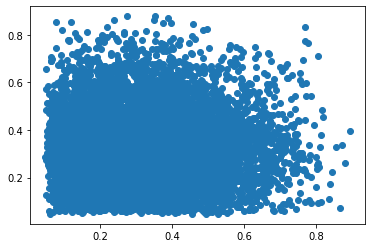

In [ ]:
plt.scatter(data['b_w_norm'], data['b_h_norm'])

Determine number of clusters by Elbow Method

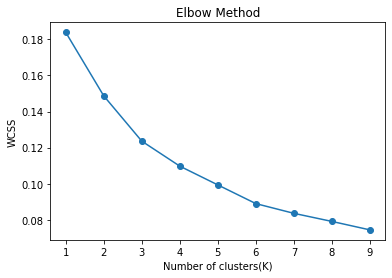

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data[['b_h_norm', 'b_w_norm']])
    wcss.append(sum(np.min(cdist(data[['b_h_norm', 'b_w_norm']], kmeans.cluster_centers_, 'euclidean'), axis=1)) /data[['b_h_norm', 'b_w_norm']].shape[0])
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS')
plt.show()


## Iou(Intersection over union) Method to find out K


In [ ]:
height = list(data['b_h_norm'])
width = list(data['b_w_norm'])
meaniou = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['b_h_norm', 'b_w_norm']])
    cx = []
    cy = []
    mapcx  = {}
    mapcy = {}
    iou = []
    for i in range(len(data)):
        l = kmeans.labels_[i]
        cx.append(kmeans.cluster_centers_[l][0])
        cy.append(kmeans.cluster_centers_[l][1])
        iou.append(min(width[i] ,cx[i])* min(height[i] , cy[i])/(height[i]*width[i]+ cx[i]*cy[i]- min(width[i] , cx[i])* min(height[i] ,cy[i])))
    meaniou.append(sum(iou)/len(data))

## Plot clusters Vs AverageIOU

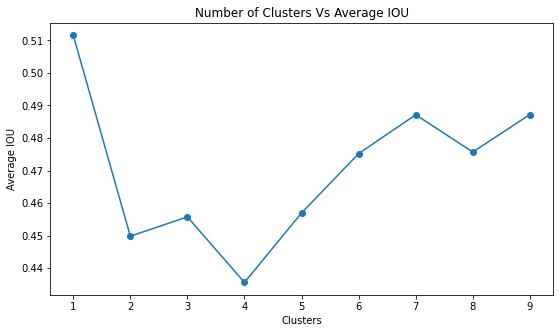

In [ ]:
fig = plt.figure(figsize=(9, 5))
plt.plot(range(1,10), meaniou, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Average IOU')
plt.title("Number of Clusters Vs Average IOU")
plt.show()

## Determine Clusters and Anchor Boxes

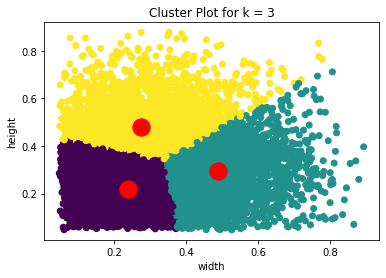

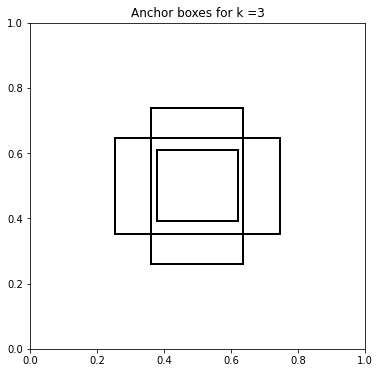

Anchor Boxes Centroids
[[0.23937561 0.21800972]
 [0.2747049  0.47820696]
 [0.49000069 0.2933176 ]]


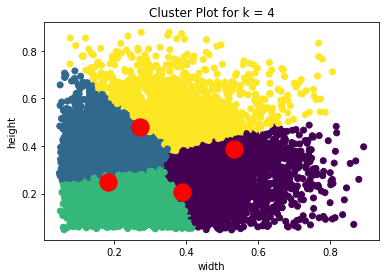

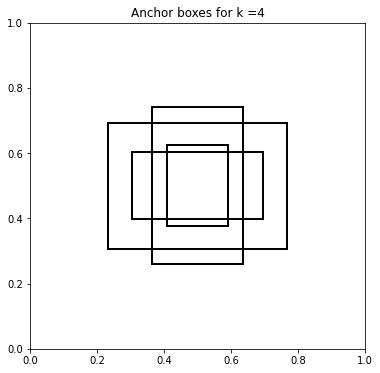

Anchor Boxes Centroids
[[0.27242493 0.48097647]
 [0.38892595 0.20521151]
 [0.18160679 0.24723699]
 [0.53279805 0.38518916]]


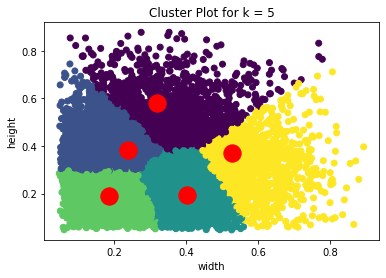

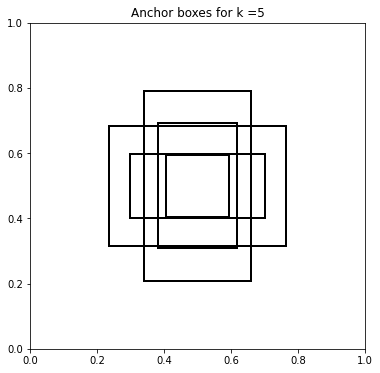

Anchor Boxes Centroids
[[0.5272217  0.36883626]
 [0.40128108 0.19582219]
 [0.23798785 0.38192967]
 [0.18646305 0.18887418]
 [0.31869355 0.58138919]]


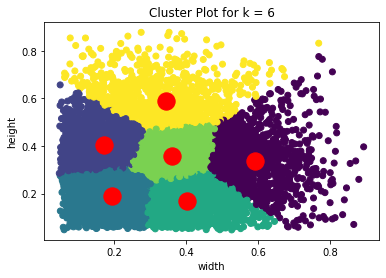

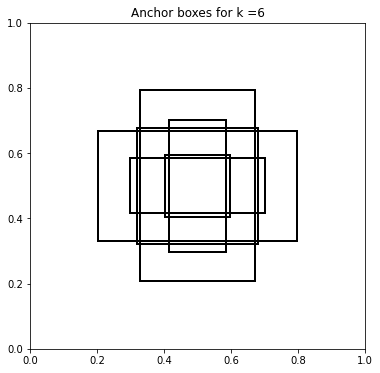

Anchor Boxes Centroids
[[0.34423629 0.58712627]
 [0.40289598 0.17028642]
 [0.19244854 0.1904382 ]
 [0.17267584 0.40450918]
 [0.35962054 0.35578995]
 [0.59183155 0.3359177 ]]


In [ ]:
for clusters in range(3,7):
    kmeans = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(data[['b_h_norm', 'b_w_norm']])
    plt.scatter(data['b_w_norm'], data['b_h_norm'],c=pred_y, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
    plt.xlabel('width')
    plt.ylabel('height')
    plt.title(f'Cluster Plot for k = {kmeans.n_clusters}')
    plt.show()

    fig, axes = plt.subplots(1,1,figsize= (6, 6))
    anchors = kmeans.cluster_centers_
    for i in range(0, clusters):
        axes.add_patch(Rectangle((-1*anchors[i][0]/2 + 0.5, -1*anchors[i][1]/2 + 0.5), anchors[i][0], anchors[i][1], fill=False, linewidth=2))
    axes.set_title('Anchor boxes for k =' f'{clusters}')
    plt.show()
    print("Anchor Boxes Centroids")
    print(kmeans.cluster_centers_)